# Module 12: Machine Learning

Author: Jackson Viscomi \
Class: BMI 6018 \
Date: 12/4/2022 

In [83]:
#importing libraries
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [84]:
#read diabetes data into pandas
path = 'C:/Users/jcviscom/OneDrive - Intermountain Healthcare/BMI Degree/6018/Module 11/diabetic_data.csv'
diabetes_data = pd.read_csv(path)

### 1) Using one of the three datasets to demonstrate k-means clustering using the scikit learn package (50 points).

<AxesSubplot:>

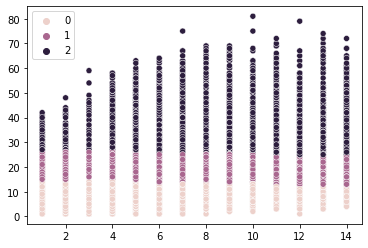

In [85]:
#creating an array for K-means to fit
DB_kmeans_prep = np.array(diabetes_data[['time_in_hospital','num_medications']]) 

kmeans = KMeans(n_clusters=3) #3-cluster k-means 
kmeans.fit(DB_kmeans_prep) #fitting
kmeans.labels_ #Labels of each point

#seaborn scatter plot with K-means grouping as the plot color
sns.scatterplot(x = DB_kmeans_prep[:,0], y = DB_kmeans_prep[:,1], hue=kmeans.labels_) 

### 2) Calculate the sum of least square error for each different values of 'k'. 

In [63]:
#testing SSE from 1-10 clusters 
k = range(1,10)

#using a loop to fit K means and calcuate SSE for each size of K
#results will live in sum_squared_errors array
sum_squared_errors = []
for i in k:
  model = KMeans(n_clusters = i)
  model.fit_predict(DB_kmeans_prep)
  sum_squared_errors.append(model.inertia_) #interia_ is a shortcut for SSE formula (work smarter not harder)
sum_squared_errors


[7629138.961313395,
 3435993.5379105797,
 2169005.7701111897,
 1597608.0140319013,
 1295110.240380117,
 1089605.1295255243,
 926281.5639040121,
 812784.1891220036,
 715451.6344437983]

### 3) Using Matplotlib determine the optimal number of clusters (k) using the elbow method along with a brief explanation (50 points). 

#### Elbow-Method Explanation:
The **sum of squard errors (SSE)** is a method to measure a cluster's performance by summing each distance from the assigned cluster centriod to each indivudal data point in the corresponding cluster.

While the SSE will decrease with the addition of more clusters, you reach a point of dimenishing returns where each iteration will futher complicate the output while adding marginal accurarcy (and a greater risk of overfitting the training set).

The **elbow method** is a visual way to find the optimal number of clusters by finding the k-value at the "elbow" of the curve (where iterative large jumps in performance turn into small jumps) 

Text(0, 0.5, 'Sum of Squared Errors')

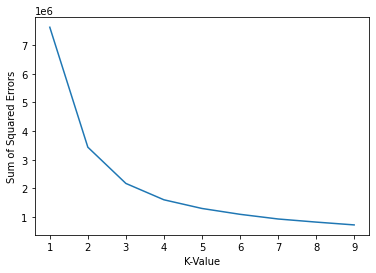

In [61]:
plt.plot(k,sum_squared_errors) #For the range of the test [1:10], plot the SSE value
#x and y labels
plt.xlabel('K-Value') 
plt.ylabel('Sum of Squared Errors')
#check plot

We see the elbow is around K = 3 (lucky guess, I don't have to change my model)

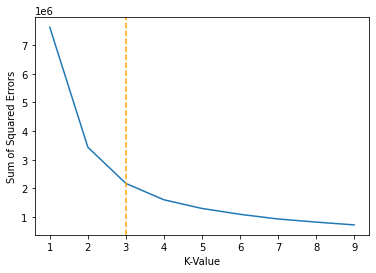

In [50]:
#put K=3 refrence line for visualization
#same as before
plt.plot(k,sum_squared_errors)
plt.xlabel('K-Value')
plt.ylabel('Sum of Squared Errors')

#using axvline() function to put a dashed orange line at x (or K) = 3
plt.axvline(x=3, color = 'Orange',linestyle='--')

### 4) Finally plot the optimal clusters with their centroids along with a brief explanation (50 points). 

#### Centriods Explanation: 
**The centriod is center point of each cluster**

These "final" centriods we see in the model are a result of a k-number of intially random centriods being optimized until the sum of squares for each cluster has basically reached a standstill at the mininum (or the max number of iternations has been hit).

The kmean.cluster_centers_ attribute produces an array that displays the [x,y] coordinates of each centriod, as shown below:

In [69]:
kmeans.cluster_centers_

array([[ 3.10664723,  9.67955136],
       [ 4.95955548, 18.65577895],
       [ 7.60043478, 32.30069565]])

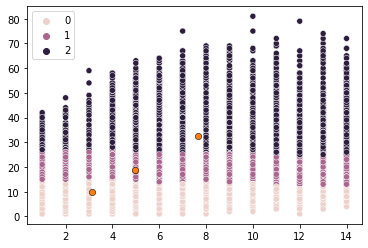

In [91]:

#same seaborn scatter plot as step 1
ax = sns.scatterplot(x = DB_kmeans_prep[:, 0],y = DB_kmeans_prep[:, 1], hue=kmeans.labels_)

#using orange as the color for each centriod, since it is easy to see
colors = ['Orange','Orange','Orange']

#each of the x and y-coordinates for the centriods


#overlay of centriods on k-means scatterplot 
ax = sns.scatterplot(\
                     #each of the x and y-coordinates for the centriods
                     x = kmeans.cluster_centers_[:, 0],y = kmeans.cluster_centers_[:, 1] \
                     #some visual fixes (centroid color, size, outline, no legend)
                     ,palette = colors, s=40, ec='black', legend=False) #
plt.show()